In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as st 
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
df = pd.read_csv("F:/DA/DATASET/yellow_tripdata_2020-01.csv/yellow_tripdata_2020-01.csv")

In [3]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


# Exploratory Data Analysis

In [5]:
df.shape

(6405008, 18)

In [7]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [8]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [9]:
df['trip_duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']

In [10]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,0 days 00:04:48
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,0 days 00:07:25
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,0 days 00:06:11
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,0 days 00:04:51
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,0 days 00:02:18


In [13]:
df['trip_duration'] = df['trip_duration'].dt.total_seconds()/60

In [14]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0,2.300000


In [17]:
df = df[['passenger_count','payment_type','fare_amount','trip_distance','trip_duration']]

In [18]:
df.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
trip_duration          0
dtype: int64

In [19]:
65441 /len(df) *100  # checking what % of data is effecting the data

1.021716132126611

In [20]:
df.dropna(inplace=True)

In [22]:
df

,passenger_count,payment_type,fare_amount,trip_distance,trip_duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [23]:
df['passenger_count'] = df['passenger_count'].astype(int)
df['payment_type'] = df['payment_type'].astype(int)

In [28]:
df[df.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,trip_duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [29]:
df.drop_duplicates(inplace=True) # dropping the duplicate values

In [30]:
df.shape

(3007861, 5)

In [31]:
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

#### In the above code it shows the frequency of no. of passengers in the taxi here we can see that 7,8,9 contribute very less to this in terms of %

In [32]:
df['payment_type'].value_counts(normalize=True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

In [34]:
df = df[df['payment_type']<3]
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 6)]

In [35]:
df.shape

(2780283, 5)

In [36]:
df['payment_type'].replace({1:'Credit card',2:'Cash'},inplace=True)

In [37]:
df

,passenger_count,payment_type,fare_amount,trip_distance,trip_duration
0,1,Credit card,6.0,1.20,4.800000
1,1,Credit card,7.0,1.20,7.416667
2,1,Credit card,6.0,0.60,6.183333
3,1,Credit card,5.5,0.80,4.850000
4,1,Cash,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,Credit card,10.0,2.09,14.800000
6339561,1,Credit card,17.5,4.11,21.500000
6339563,1,Credit card,13.0,2.13,19.000000
6339564,1,Credit card,12.5,2.55,16.283333


In [41]:
df.describe()

,passenger_count,fare_amount,trip_distance,trip_duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


#### while when we see describe feature of the dataset we can see that the min values of the fare_amount and trip_distance , trip_duration are in -ve which is not possible, so need to remove these incorrect values

In [42]:
df = df[df['fare_amount'] > 0]
df = df[df['trip_distance'] > 0]
df = df[df['trip_duration'] > 0]

(array([2.748913e+06, 1.600000e+01, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.000000e-02, 4.265090e+02, 8.530080e+02, 1.279507e+03,
        1.706006e+03, 2.132505e+03, 2.559004e+03, 2.985503e+03,
        3.412002e+03, 3.838501e+03, 4.265000e+03]),
 <BarContainer object of 10 artists>)

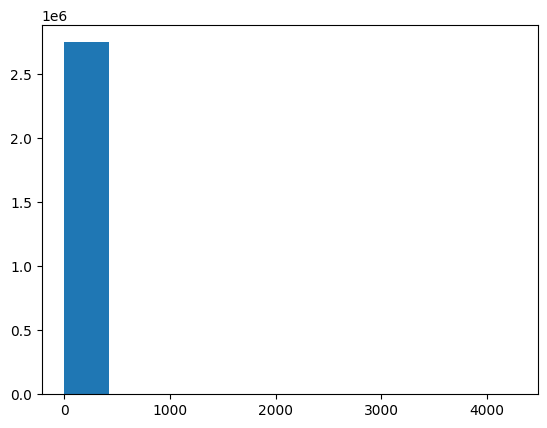

In [45]:
plt.hist(df['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d2a9b0d210>,
 'caps': [<matplotlib.lines.Line2D at 0x1d2a9b0d750>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d2a9b0cf70>],
 'medians': [<matplotlib.lines.Line2D at 0x1d2a9b0dc90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d2a9b0df30>],
 'means': []}

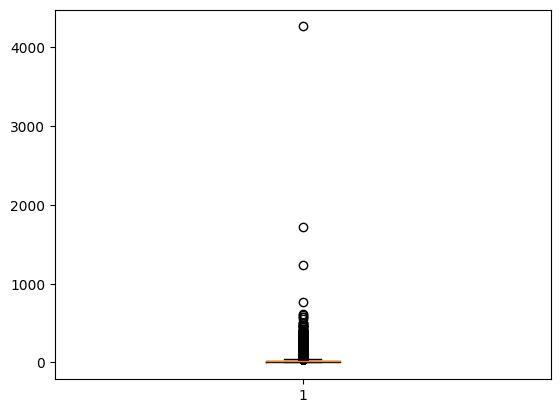

In [46]:
plt.boxplot(df['fare_amount'])

#### In the above graph we can see that outliers lie in the range of 4000 which is needed to be eradicated

In [47]:
for col in ['fare_amount','trip_distance','trip_duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

### The above method is a statistical method to remove outliers

In [48]:
df

,passenger_count,payment_type,fare_amount,trip_distance,trip_duration
0,1,Credit card,6.0,1.20,4.800000
1,1,Credit card,7.0,1.20,7.416667
2,1,Credit card,6.0,0.60,6.183333
3,1,Credit card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Credit card,10.5,2.40,12.383333
6339555,3,Credit card,10.0,2.09,14.800000
6339561,1,Credit card,17.5,4.11,21.500000
6339563,1,Credit card,13.0,2.13,19.000000


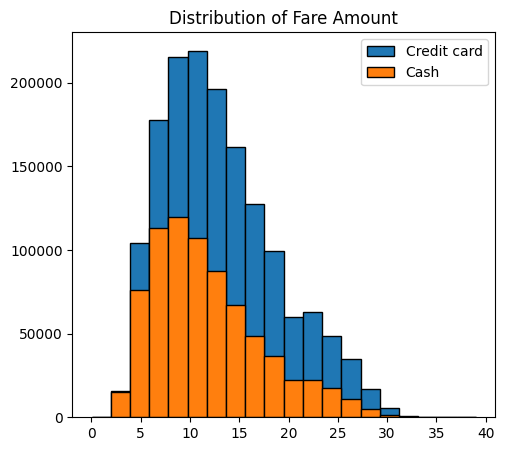

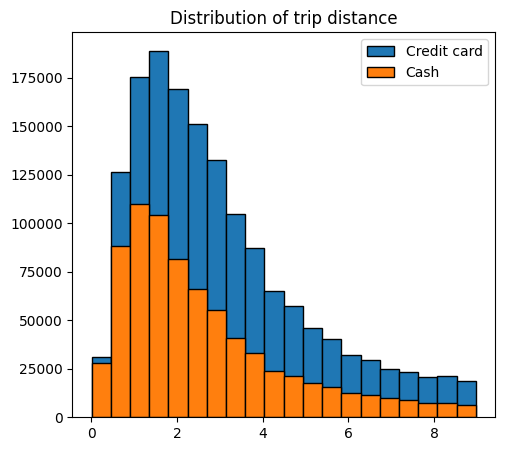

In [54]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(df[df['payment_type'] == 'Credit card']['fare_amount'], histtype='barstacked', label='Credit card', bins=20 , edgecolor='black')
plt.hist(df[df['payment_type'] == 'Cash']['fare_amount'], histtype='barstacked', label='Cash', bins=20 , edgecolor='black')
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of trip distance')
plt.hist(df[df['payment_type'] == 'Credit card']['trip_distance'], histtype='barstacked', label='Credit card', bins=20 , edgecolor='black')
plt.hist(df[df['payment_type'] == 'Cash']['trip_distance'], histtype='barstacked', label='Cash', bins=20 , edgecolor='black')
plt.legend()
plt.show()

In [57]:
df.groupby('payment_type').agg({'fare_amount':['mean','std'],'trip_distance':['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Cash           11.758005  5.613038      2.602207  1.91372
Credit card    13.112493  5.849281      2.992237  1.99274

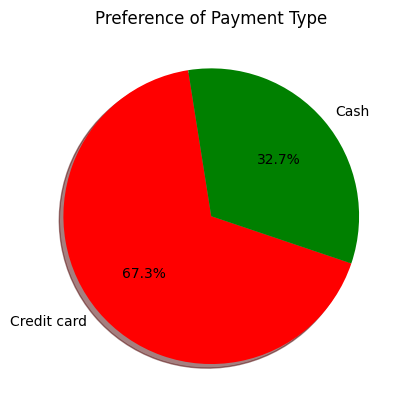

In [59]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize = True), labels = df['payment_type'].value_counts().index,
        startangle= 99, shadow = True, autopct ='%1.1f%%', colors = ['red', 'green'])
plt.show()

In [60]:
df

,passenger_count,payment_type,fare_amount,trip_distance,trip_duration
0,1,Credit card,6.0,1.20,4.800000
1,1,Credit card,7.0,1.20,7.416667
2,1,Credit card,6.0,0.60,6.183333
3,1,Credit card,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,Credit card,10.5,2.40,12.383333
6339555,3,Credit card,10.0,2.09,14.800000
6339561,1,Credit card,17.5,4.11,21.500000
6339563,1,Credit card,13.0,2.13,19.000000
